In [1]:
%matplotlib inline
import pickle
import csv
import pandas as pd

In [2]:
data = pd.read_pickle("data/tlf/all_pkl_data.pkl")

In [3]:

scores = csv.reader(open("data/tlf/list_score_37.csv"), delimiter=" ")

In [4]:
score_df = pd.DataFrame({"call_id": int(call_id), "score": score} for call_id, score in scores)


In [5]:
# Convierto a float
score_df.loc[score_df.score == 'NA'] = 'nan'

score_df.score = score_df.score.astype("float")

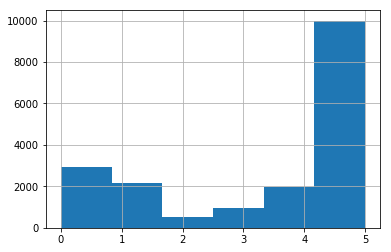

In [6]:
score_df.score.hist(bins=6)

Convirtamos el pickle en un dataframe

In [49]:


def create_rows(data, key):
    base = data[key][0]
    keys = base.keys()
    
    speaker_A = {k:base[k].loc[0, "E_AB"] for k in keys} 
    speaker_A["speaker"] = 0
    speaker_A["id"] = key

    speaker_B = {k:base[k].loc[0, "E_BA"] for k in keys} 
    speaker_B["speaker"] = 1
    speaker_B["id"] = key

    return [speaker_A, speaker_B]

keys = data.keys()

df = pd.DataFrame(row for key in keys for row in create_rows(data, key))


Mmmm....me parece que están un poco sesgados para arriba los entrainments

In [64]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


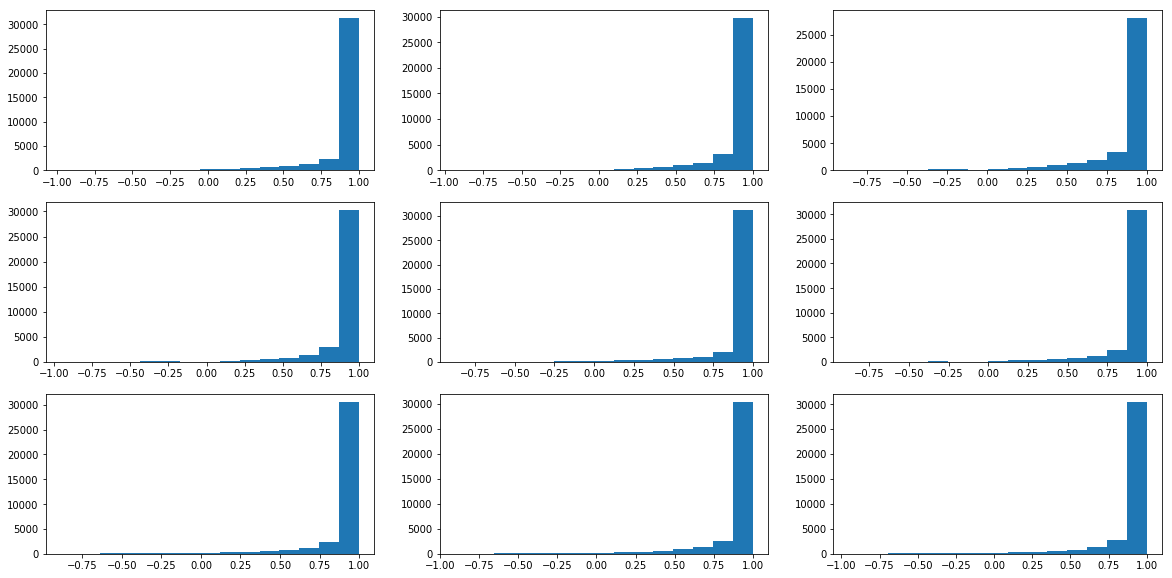

In [65]:

acoustic_variables = [u'ENG_MAX', u'ENG_MEAN', u'F0_MAX', u'F0_MEAN',
       u'NOISE_TO_HARMONICS_RATIO', u'SOUND_ALL_LOCAL_JITTER',
       u'SOUND_ALL_LOCAL_SHIMMER', u'SOUND_VOICED_LOCAL_JITTER',
       u'SOUND_VOICED_LOCAL_SHIMMER']
plt.figure(figsize=(20,10))

for i, ac_var in enumerate(acoustic_variables):
    subplot(3,3,i+1)
    plt.title()
    hist(df[ac_var], bins=15)

In [48]:
data['712002009363898'][0]['ENG_MAX']

,E_AB,E_BA,l_AB,l_BA
0,0.999276,0.999276,0,0
